# LABORATORIO 6

In [1]:
import pandas as pd
import numpy as np
from typing import List, Callable, Any
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### DATOS

In [2]:
x = pd.read_csv('/Users/maria/OneDrive/Documentos/mle_laboratorios/Lab6/Lab6/wine_data.csv',
                names=["1", "2", "3", "4","5", "6", "7", "8","9", "10", "11", "12", "13","14"])

print(type(x), x.shape)

<class 'pandas.core.frame.DataFrame'> (178, 14)


In [3]:
x.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


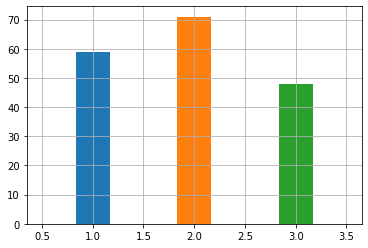

In [4]:
#visualizacion datos de cada tipo de vino
x.groupby('1')['1'].hist(bins=3)
plt.show()

In [5]:
#Separacion de dataset en variable dependiente e independientes
Y = x['1']
X = x.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
print(X.shape, Y.shape)

(178, 13) (178,)


In [6]:
X.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### ESTANDARIZACION DE VARIABLES INDEPENDIENTES

In [7]:
sc = StandardScaler()
est = sc.fit_transform(X)
est = pd.DataFrame(est)

In [8]:
est.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [9]:
est = pd.concat([pd.Series(1, index = est.index, name = '13'), est], axis=1)
print(type(est), est.shape)

<class 'pandas.core.frame.DataFrame'> (178, 14)


In [10]:
Y_procesado = np.array(Y).T
Y_procesado = Y_procesado.reshape(178,1)
X_procesado = np.array(est)

m,n = X_procesado.shape
print(X_procesado.shape, Y_procesado.shape)

(178, 14) (178, 1)


In [11]:
x_train, x_test = train_test_split(X_procesado, test_size=0.33)
y_train, y_test = train_test_split(Y_procesado, test_size=0.33)

### FUNCIONES

Se realiza una prueba general del algoritmo con el dataset entero, se validara la funcionalidad para cada clase mas adelante

In [12]:
theta_0 = np.random.rand(n, 1).T

In [13]:
def hyp(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001

In [14]:
def log_cost(X, y, theta):
    y1 = hyp(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [15]:
def gradient_descent(X, y, theta, learning_rate, max_iter):
    m =len(X)
    J = [log_cost(X, y, theta)] 
    for i in range(0, max_iter):
        h = hyp(X, theta)
        for i in range(0, len(X)):
            theta = theta - (learning_rate * log_cost(X, y, theta))
        J.append(log_cost(X, y, theta))
    return J, theta

In [16]:
costs, theta = gradient_descent(X_procesado, Y_procesado, theta_0, learning_rate = 0.0001, max_iter = 1000)

In [17]:
c, t = gradient_descent(x_train, y_train, theta_0, learning_rate = 0.000001, max_iter = 10000)

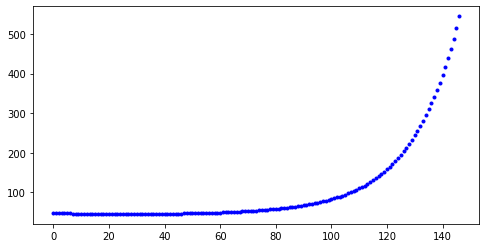

In [18]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(10001),c,'b.')

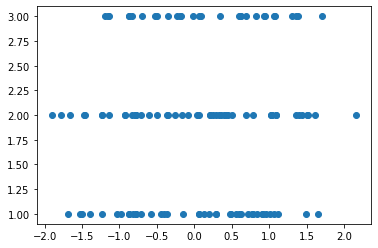

In [19]:
pred = hyp(x_test,theta)
plt.figure()
plt.scatter(x=x_train[:,1],y= y_train)          
plt.scatter(x=x_test[:,1], y=pred)
plt.show()

In [20]:
uno = x[x['1']==1]
dos = x[x['1']==2]
tres = x[x['1']==3]

### CLASE 1

In [21]:
Y1 = uno['1']
X1 = uno.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
print(X1.shape, Y1.shape)

(59, 13) (59,)


In [22]:
sc1 = StandardScaler()
est1 = sc.fit_transform(X1)
est1 = pd.DataFrame(est1)

Y_procesado1 = np.array(Y1).T
Y_procesado1 = Y_procesado1.reshape(59,1)
X_procesado1 = np.array(est1)

m1,n1 = X_procesado1.shape
x_train1, x_test1 = train_test_split(X_procesado1, test_size=0.33)
y_train1, y_test1 = train_test_split(Y_procesado1, test_size=0.33)

theta_01 = np.random.rand(n1, 1).T

In [23]:
c1, t1 = gradient_descent(x_train1, y_train1, theta_01, learning_rate = 0.00001, max_iter = 1000)

In [36]:
print(min(c1))

29.458007153676018


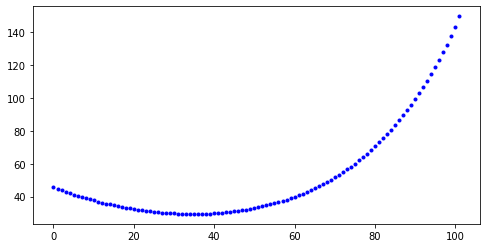

In [24]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(1001),c1,'b.')

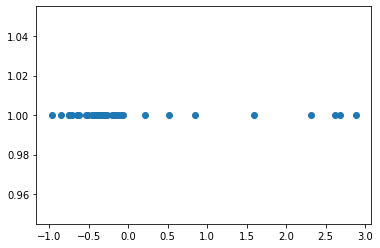

In [25]:
pred1 = hyp(x_test1,t1)
plt.figure()
plt.scatter(x=x_train1[:,1],y= y_train1)          
plt.scatter(x=x_test1[:,1], y=pred1)
plt.show()

### CLASE 2

In [26]:
Y2 = dos['1']
X2 = dos.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
print(X2.shape, Y2.shape)

(71, 13) (71,)


In [27]:
sc2 = StandardScaler()
est2 = sc.fit_transform(X2)
est2 = pd.DataFrame(est2)

Y_procesado2 = np.array(Y2).T
Y_procesado2 = Y_procesado2.reshape(71,1)
X_procesado2 = np.array(est2)

m2,n2 = X_procesado2.shape
x_train2, x_test2 = train_test_split(X_procesado2, test_size=0.33)
y_train2, y_test2 = train_test_split(Y_procesado2, test_size=0.33)

theta_02 = np.random.rand(n2, 1).T

In [28]:
c2, t2 = gradient_descent(x_train2, y_train2, theta_02, learning_rate = 0.00001, max_iter = 1000)

In [37]:
print(min(c2))

30.90927264602434


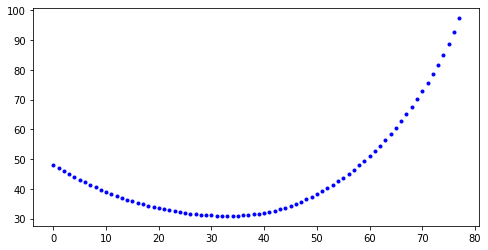

In [29]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(1001),c2,'b.')

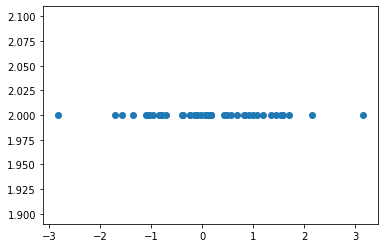

In [30]:
pred2 = hyp(x_test2,t2)
plt.figure()
plt.scatter(x=x_train2[:,2],y= y_train2)          
plt.scatter(x=x_test2[:,2], y=pred2)
plt.show()

### CLASE 3

In [31]:
Y3 = tres['1']
X3 = tres.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
print(X3.shape, Y3.shape)

(48, 13) (48,)


In [32]:
sc3 = StandardScaler()
est3 = sc.fit_transform(X3)
est3 = pd.DataFrame(est3)

Y_procesado3 = np.array(Y3).T
Y_procesado3 = Y_procesado3.reshape(48,1)
X_procesado3 = np.array(est3)

m3,n3 = X_procesado3.shape
x_train3, x_test3 = train_test_split(X_procesado3, test_size=0.33)
y_train3, y_test3 = train_test_split(Y_procesado3, test_size=0.33)

theta_03 = np.random.rand(n3, 1).T

In [45]:
c3, t3 = gradient_descent(x_train3, y_train3, theta_03, learning_rate = 0.00001, max_iter = 1000)

In [46]:
print(min(c3))

24.585881746473916


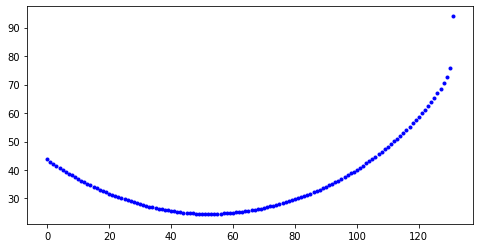

In [47]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(1001),c3,'b.')

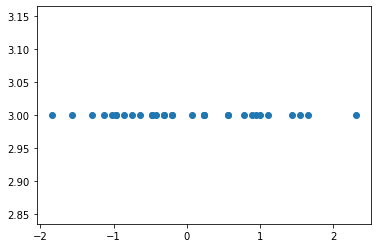

In [40]:
pred3 = hyp(x_test3,t3)
plt.figure()
plt.scatter(x=x_train3[:,2],y= y_train3)          
plt.scatter(x=x_test3[:,2], y=pred3)
plt.show()

## ANALISIS RESULTADOS

Aunque los graficos de gradient descent convergieron demasiado pronto, era la mejor forma de observar el comportamiento, ya que al reducir las iteraciones se perdia la caida y quedaba como una recta, por ende solo se busco el minimo de los resultados que realmente es lo que se buscaba.

Los modelos para las 3 clases obtuvieron resultados bastante similares, aunque el de la clase 2 se considera el mejor. Puesto que logro el menor resultado del decenso del gradiente y la nube de datos se ve mas centralizada. 

La nube de datos con el comportamiento mas similar a una funcion logistica fue el que contaba con las tres caracteristicas, aunque por tener tres lineas se podria suponer que es una de cada clase. 

Aunque fue bastante complejo lograr un modelo que funcionara realmente, se considera que este es el mejor debido a su capacidad de predecir los resultados y al comportamiento tanto en las nubes de datos como en el decenso del gradiente.